In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [84]:
df= pd.read_csv('/content/fake_or_real_news.csv')
df.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  
5    \nI’m not an immigrant, but my grandparents ...  FAKE  
6  Share This Baylee Luciani (left), Screenshot o...  FAKE  
7  A Czech stockbroker who saved more than 650 Je...  REAL  
8  Hillary Clinton and Donald Trump made some ina...  REAL  
9  Iranian negotiators reportedly have made a las...  REAL

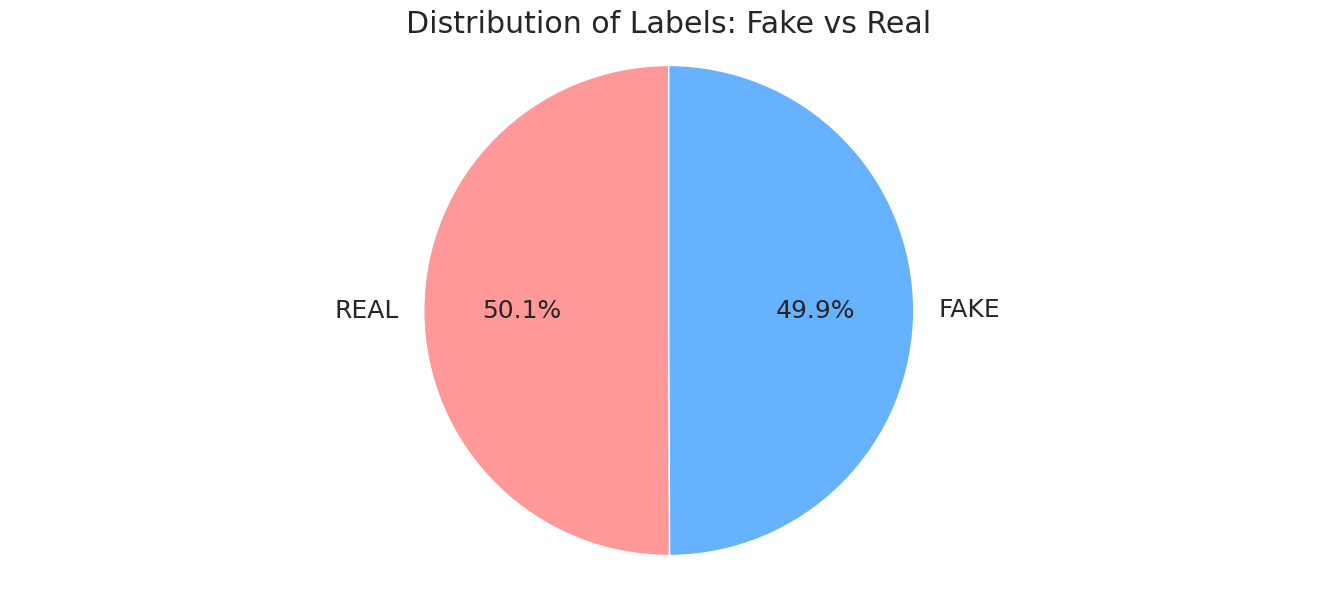

REAL    3171
FAKE    3164
Name: label, dtype: int64


In [85]:
label_counts = df['label'].value_counts()

# Plotting a pie chart
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=['#FF9999', '#66B2FF'])
plt.title('Distribution of Labels: Fake vs Real')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.show()

# Display the count of each label
print(label_counts)

In [86]:
length = len(data['label'][0])
print(f'Length of a sample news: {length}')

Length of a sample news: 4


In [87]:
df['Length'] = df['label'].str.len()
df.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  Length  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE       4  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE       4  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL       4  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE       4  
4  It's primary day in New York and front-runners...  REAL       4  
5    \nI’m not an immigrant, but my grandparents ...  FAKE       4  
6  Share This Baylee Luciani (left), Screenshot o...  FAKE       4  
7  A Czech stockbroker who saved more than 650 Je...  REAL       4  
8  Hillary Clinton and Donald Trump made some ina...  REAL       4  
9  Iranian negotiators reportedly have made a las...  REAL       4

In [88]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

In [89]:
df['Word_count'] = df['label'].apply(word_count)
df.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  Length  Word_count  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE       4           1  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE       4           1  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL       4           1  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE       4           1  
4  It's primary day in New York and front-runners...  REAL       4           1  
5    \nI’m not an immigrant, but my grandparents ...  FAKE       4           1  
6  Share This Baylee Luciani (left), Screenshot o...  FAKE       4           1  
7  A Czech stockbroker who saved more than 650 Je...  REAL       4           1  
8  Hillary Clinton and Donald Trump made some ina...  REAL       4           1  
9  Iranian negotiators reportedly have made a las...  REAL       4           1

In [90]:
df['mean_word_length'] = df['label'].map(lambda rev: np.mean([len(word) for word in rev.split()]))
df.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  Length  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE       4   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE       4   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL       4   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE       4   
4  It's primary day in New York and front-runners...  REAL       4   
5    \nI’m not an immigrant, but my grandparents ...  FAKE       4   
6  Share This Baylee Luciani (left), Screenshot o...  FAKE       4   
7  A Czech stockbroker who saved more than 650 Je...  REAL       4   
8  Hillary Clinton and Donald Trump made some ina...  REAL       4   
9  Iranian negotiators reportedly have made a las...  REAL       4   

   Word_count  mean_word_length  
0           1               4.0  
1           1               4.0  
2           1               4.0  
3           1               4.0  
4           1               4.0  
5           1               4.0  
6           1               4.0  
7           1               4.0  
8           1               4.0  
9           1               4.0

In [91]:
nltk.download('punkt')
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['label'][0])])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4.0

In [92]:
df['mean_sent_length'] = df['label'].map(lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  Length  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE       4   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE       4   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL       4   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE       4   
4  It's primary day in New York and front-runners...  REAL       4   
5    \nI’m not an immigrant, but my grandparents ...  FAKE       4   
6  Share This Baylee Luciani (left), Screenshot o...  FAKE       4   
7  A Czech stockbroker who saved more than 650 Je...  REAL       4   
8  Hillary Clinton and Donald Trump made some ina...  REAL       4   
9  Iranian negotiators reportedly have made a las...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  
0           1               4.0               4.0  
1           1               4.0               4.0  
2           1               4.0               4.0  
3           1               4.0               4.0  
4           1               4.0               4.0  
5           1               4.0               4.0  
6           1               4.0               4.0  
7           1               4.0               4.0  
8           1               4.0               4.0  
9           1               4.0               4.0

In [93]:
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  Length  \
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE       4   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE       4   
2  U.S. Secretary of State John F. Kerry said Mon...  REAL       4   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE       4   
4  It's primary day in New York and front-runners...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  
0           1               4.0               4.0  
1           1               4.0               4.0  
2           1               4.0               4.0  
3           1               4.0               4.0  
4           1               4.0               4.0

In [94]:
def clean(review):

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review

In [95]:
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'text', 'label', 'Length', 'Word_count',
       'mean_word_length', 'mean_sent_length'],
      dtype='object')


In [97]:
df['text'] = df['text'].apply(clean)
df.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   
5  im immigrant grandparents 50 years ago arrived...  FAKE       4   
6  share baylee luciani left screenshot baylee ca...  FAKE       4   
7  czech stockbroker saved 650 jewish children na...  REAL       4   
8  hillary clinton donald trump made inaccurate c...  REAL       4   
9  iranian negotiators reportedly made last-ditch...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  
0           1               4.0               4.0  
1           1               4.0               4.0  
2           1               4.0               4.0  
3           1               4.0               4.0  
4           1               4.0               4.0  
5           1               4.0               4.0  
6           1               4.0               4.0  
7           1               4.0               4.0  
8           1               4.0               4.0  
9           1               4.0               4.0

In [98]:
df['text'][0]

'daniel greenfield shillman journalism fellow freedom center new york writer focusing radical islam final stretch election hillary rodham clinton gone war fbi word unprecedented thrown around often election ought retired still unprecedented nominee major political party go war fbi thats exactly hillary people done coma patients waking watching hour cnn hospital beds would assume fbi director james comey hillarys opponent election fbi attack everyone obama cnn hillarys people circulated letter attacking comey currently media hit pieces lambasting targeting trump wouldnt surprising clintons allies start running attack ads fbi fbis leadership warned entire left-wing establishment form lynch mob continue going hillary fbis credibility attacked media democrats preemptively head results investigation clinton foundation hillary clinton covert struggle fbi agents obamas doj people gone explosively public new york times compared comey j edgar hoover bizarre headline james comey role recalls hoo

In [99]:
def corpus(text):
    text_list = text.split()
    return text_list

In [100]:
df['text_lists'] = df['text'].apply(corpus)
df.head(10)

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   
5        6903                                        Tehran, USA   
6        7341  Girl Horrified At What She Watches Boyfriend D...   
7          95                  ‘Britain’s Schindler’ Dies at 106   
8        4869  Fact check: Trump and Clinton at the 'commande...   
9        2909  Iran reportedly makes new push for uranium con...   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   
5  im immigrant grandparents 50 years ago arrived...  FAKE       4   
6  share baylee luciani left screenshot baylee ca...  FAKE       4   
7  czech stockbroker saved 650 jewish children na...  REAL       4   
8  hillary clinton donald trump made inaccurate c...  REAL       4   
9  iranian negotiators reportedly made last-ditch...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   
5           1               4.0               4.0   
6           1               4.0               4.0   
7           1               4.0               4.0   
8           1               4.0               4.0   
9           1               4.0               4.0   

                                          text_lists  
0  [daniel, greenfield, shillman, journalism, fel...  
1  [google, pinterest, digg, linkedin, reddit, st...  
2  [us, secretary, state, john, f, kerry, said, m...  
3  [kaydee, king, kaydeeking, november, 9, 2016, ...  
4  [primary, day, new, york, front-runners, hilla...  
5  [im, immigrant, grandparents, 50, years, ago, ...  
6  [share, baylee, luciani, left, screenshot, bay...  
7  [czech, stockbroker, saved, 650, jewish, child...  
8  [hillary, clinton, donald, trump, made, inaccu...  
9  [iranian, negotiators, reportedly, made, last-...

In [101]:
corpus = []
for i in trange(df.shape[0], ncols=150, nrows=10, colour='green', smoothing=0.8):
    corpus += data['text_lists'][i]
len(corpus)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 6335/6335 [00:00<00:00, 41857.28it/s]


2764696

In [102]:
mostCommon = Counter(corpus).most_common(10)
mostCommon

[('said', 18875),
 ('trump', 16749),
 ('clinton', 13323),
 ('would', 12609),
 ('us', 12248),
 ('people', 11003),
 ('one', 10664),
 ('new', 9144),
 ('also', 8129),
 ('state', 7891)]

In [103]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

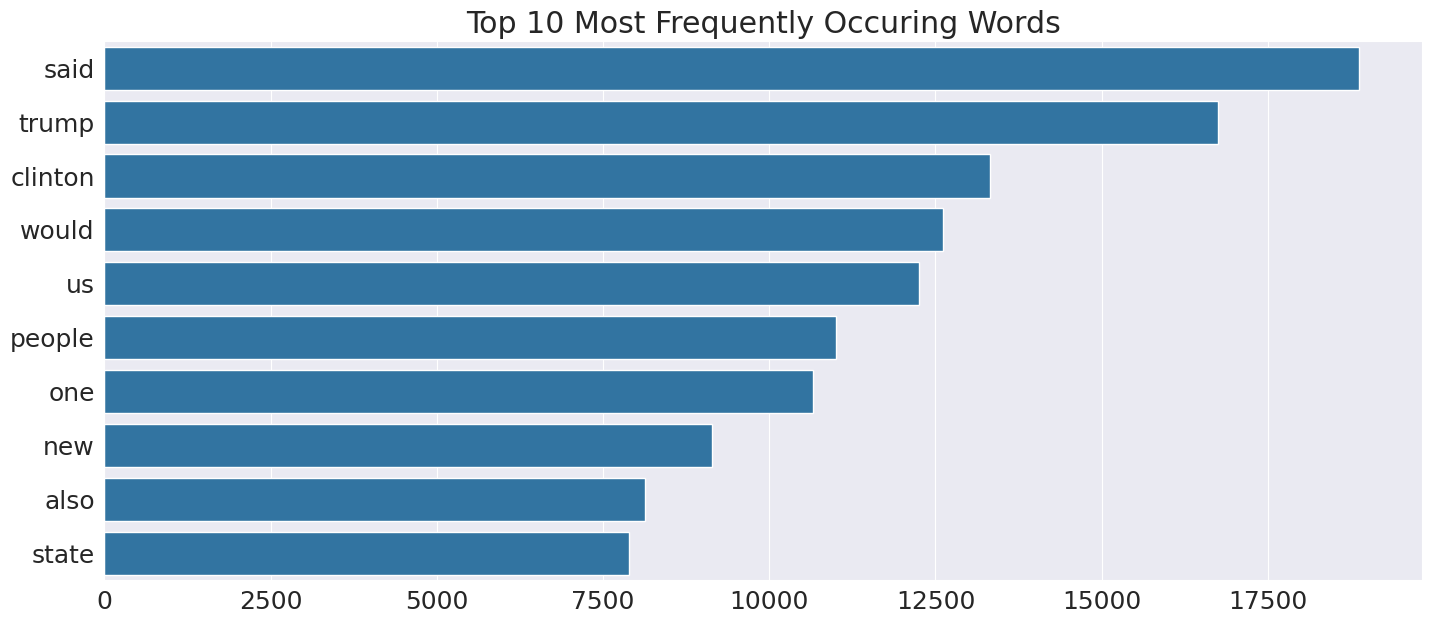

In [104]:
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

In [105]:
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['text'])


In [106]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

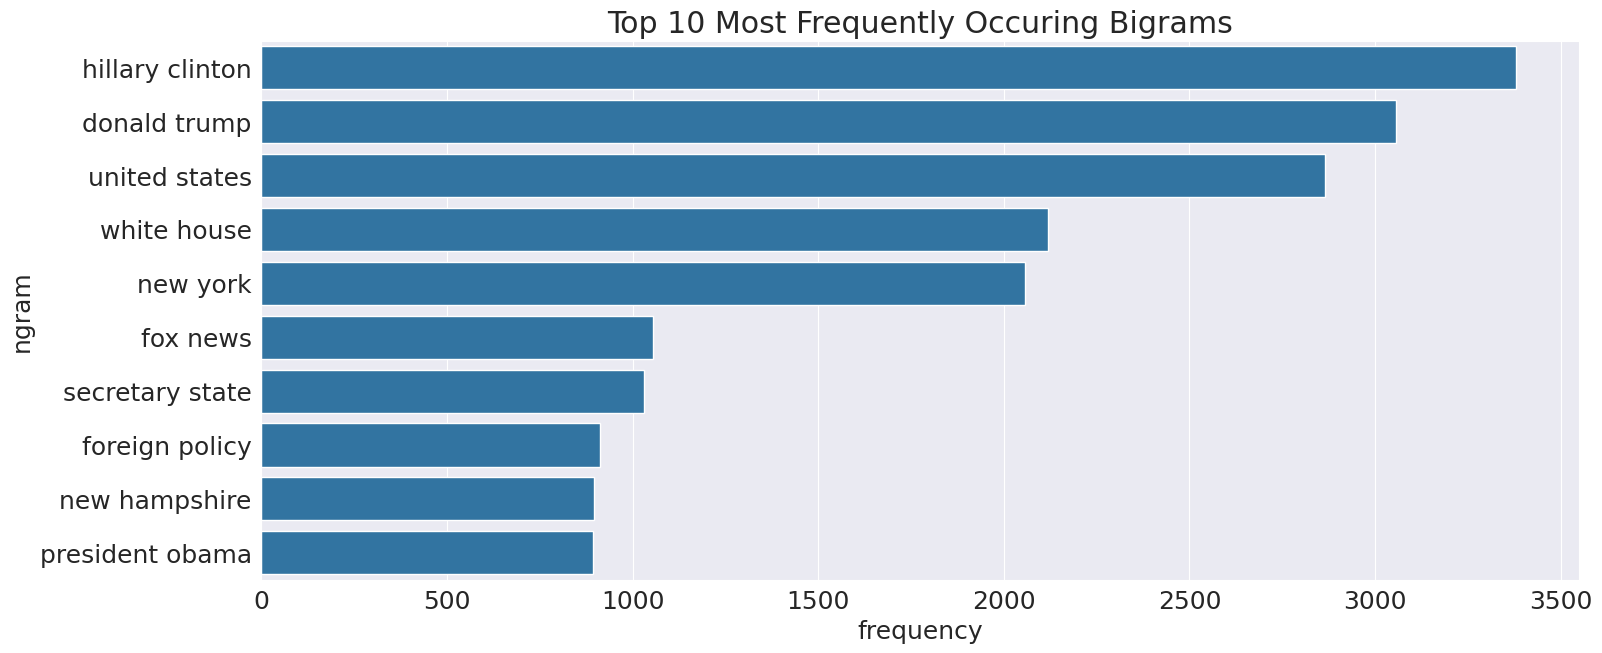

In [107]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [108]:
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(df['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

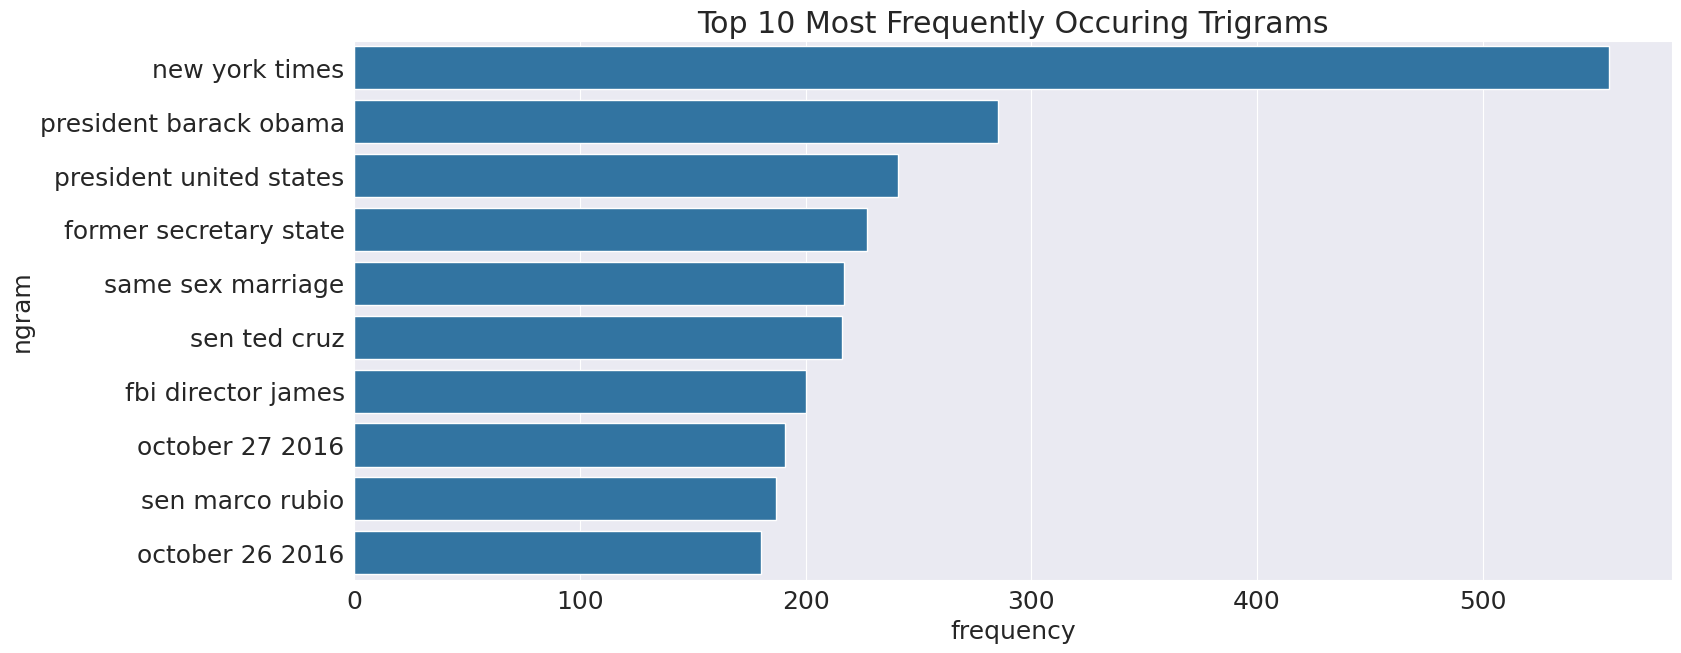

In [109]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Trigrams')
plt.show()

Importing the Libraries

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importing the dataset

In [111]:
import string as st
def remove_punctuation(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [112]:
df['New_text']=df['text'].apply(lambda x: remove_punctuation(x))
df.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   

                                          text_lists  \
0  [daniel, greenfield, shillman, journalism, fel...   
1  [google, pinterest, digg, linkedin, reddit, st...   
2  [us, secretary, state, john, f, kerry, said, m...   
3  [kaydee, king, kaydeeking, november, 9, 2016, ...   
4  [primary, day, new, york, front-runners, hilla...   

                                            New_text  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  us secretary state john f kerry said monday st...  
3  kaydee king kaydeeking november 9 2016 lesson ...  
4  primary day new york frontrunners hillary clin...

In [114]:
df = df.drop(['Unnamed: 0'],axis=1)    #Dropping the feature which we don't need
df.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   

                                          text_lists  \
0  [daniel, greenfield, shillman, journalism, fel...   
1  [google, pinterest, digg, linkedin, reddit, st...   
2  [us, secretary, state, john, f, kerry, said, m...   
3  [kaydee, king, kaydeeking, november, 9, 2016, ...   
4  [primary, day, new, york, front-runners, hilla...   

                                            New_text  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  us secretary state john f kerry said monday st...  
3  kaydee king kaydeeking november 9 2016 lesson ...  
4  primary day new york frontrunners hillary clin...

In [116]:
#Convert text in lower case, Split() applied for white space
import re
def tokenize(text):
    text = re.split('\s+', text)
    return [x.lower() for x in text]

In [117]:
df['New_text'] = df['New_text'].apply(lambda msg:tokenize(msg))
df.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   

                                          text_lists  \
0  [daniel, greenfield, shillman, journalism, fel...   
1  [google, pinterest, digg, linkedin, reddit, st...   
2  [us, secretary, state, john, f, kerry, said, m...   
3  [kaydee, king, kaydeeking, november, 9, 2016, ...   
4  [primary, day, new, york, front-runners, hilla...   

                                            New_text  
0  [daniel, greenfield, shillman, journalism, fel...  
1  [google, pinterest, digg, linkedin, reddit, st...  
2  [us, secretary, state, john, f, kerry, said, m...  
3  [kaydee, king, kaydeeking, november, 9, 2016, ...  
4  [primary, day, new, york, frontrunners, hillar...

In [118]:
def rem_small_words(text):
    return [x for x in text if len(x)>2]

In [119]:
df['New_text'] = df['New_text'].apply(lambda x: rem_small_words(x))
df.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   

                                          text_lists  \
0  [daniel, greenfield, shillman, journalism, fel...   
1  [google, pinterest, digg, linkedin, reddit, st...   
2  [us, secretary, state, john, f, kerry, said, m...   
3  [kaydee, king, kaydeeking, november, 9, 2016, ...   
4  [primary, day, new, york, front-runners, hilla...   

                                            New_text  
0  [daniel, greenfield, shillman, journalism, fel...  
1  [google, pinterest, digg, linkedin, reddit, st...  
2  [secretary, state, john, kerry, said, monday, ...  
3  [kaydee, king, kaydeeking, november, 2016, les...  
4  [primary, day, new, york, frontrunners, hillar...

In [120]:
import nltk
from nltk import PorterStemmer, WordNetLemmatizer

def rem_stopword(text):
    return[word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [121]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
df['New_text'] = df['New_text'].apply(lambda x: rem_stopword(x))
df.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   

                                          text_lists  \
0  [daniel, greenfield, shillman, journalism, fel...   
1  [google, pinterest, digg, linkedin, reddit, st...   
2  [us, secretary, state, john, f, kerry, said, m...   
3  [kaydee, king, kaydeeking, november, 9, 2016, ...   
4  [primary, day, new, york, front-runners, hilla...   

                                            New_text  
0  [daniel, greenfield, shillman, journalism, fel...  
1  [google, pinterest, digg, linkedin, reddit, st...  
2  [secretary, state, john, kerry, said, monday, ...  
3  [kaydee, king, kaydeeking, november, 2016, les...  
4  [primary, day, new, york, frontrunners, hillar...

In [123]:
def lemmatizer(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [124]:
 nltk.download('wordnet')
df['New_text'] = df['New_text'].apply(lambda x: lemmatizer(x))
df.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...


title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   
5                                        Tehran, USA   
6  Girl Horrified At What She Watches Boyfriend D...   
7                  ‘Britain’s Schindler’ Dies at 106   
8  Fact check: Trump and Clinton at the 'commande...   
9  Iran reportedly makes new push for uranium con...   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   
5  im immigrant grandparents 50 years ago arrived...  FAKE       4   
6  share baylee luciani left screenshot baylee ca...  FAKE       4   
7  czech stockbroker saved 650 jewish children na...  REAL       4   
8  hillary clinton donald trump made inaccurate c...  REAL       4   
9  iranian negotiators reportedly made last-ditch...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   
5           1               4.0               4.0   
6           1               4.0               4.0   
7           1               4.0               4.0   
8           1               4.0               4.0   
9           1               4.0               4.0   

                                          text_lists  \
0  [daniel, greenfield, shillman, journalism, fel...   
1  [google, pinterest, digg, linkedin, reddit, st...   
2  [us, secretary, state, john, f, kerry, said, m...   
3  [kaydee, king, kaydeeking, november, 9, 2016, ...   
4  [primary, day, new, york, front-runners, hilla...   
5  [im, immigrant, grandparents, 50, years, ago, ...   
6  [share, baylee, luciani, left, screenshot, bay...   
7  [czech, stockbroker, saved, 650, jewish, child...   
8  [hillary, clinton, donald, trump, made, inaccu...   
9  [iranian, negotiators, reportedly, made, last-...   

                                            New_text  
0  [daniel, greenfield, shillman, journalism, fel...  
1  [google, pinterest, digg, linkedin, reddit, st...  
2  [secretary, state, john, kerry, said, monday, ...  
3  [kaydee, king, kaydeeking, november, 2016, les...  
4  [primary, day, new, york, frontrunners, hillar...  
5  [immigrant, grandparent, year, ago, arrived, n...  
6  [share, baylee, luciani, left, screenshot, bay...  
7  [czech, stockbroker, saved, 650, jewish, child...  
8  [hillary, clinton, donald, trump, made, inaccu...  
9  [iranian, negotiator, reportedly, made, lastdi...

In [125]:
# Create sentences to get clean text as input for vectors
def return_setances(tokens):
    return " ".join([word for word in tokens])

In [126]:
df['New_text'] = df['New_text'].apply(lambda x: return_setances(x))
df.head()

title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text label  Length  \
0  daniel greenfield shillman journalism fellow f...  FAKE       4   
1  google pinterest digg linkedin reddit stumbleu...  FAKE       4   
2  us secretary state john f kerry said monday st...  REAL       4   
3  kaydee king kaydeeking november 9 2016 lesson ...  FAKE       4   
4  primary day new york front-runners hillary cli...  REAL       4   

   Word_count  mean_word_length  mean_sent_length  \
0           1               4.0               4.0   
1           1               4.0               4.0   
2           1               4.0               4.0   
3           1               4.0               4.0   
4           1               4.0               4.0   

                                          text_lists  \
0  [daniel, greenfield, shillman, journalism, fel...   
1  [google, pinterest, digg, linkedin, reddit, st...   
2  [us, secretary, state, john, f, kerry, said, m...   
3  [kaydee, king, kaydeeking, november, 9, 2016, ...   
4  [primary, day, new, york, front-runners, hilla...   

                                            New_text  
0  daniel greenfield shillman journalism fellow f...  
1  google pinterest digg linkedin reddit stumbleu...  
2  secretary state john kerry said monday stop pa...  
3  kaydee king kaydeeking november 2016 lesson to...  
4  primary day new york frontrunners hillary clin...

In [127]:
df.sample(10)

title  \
2572  Audio: Justice Scalia on black students at top...   
4343  BREAKING: Massive Voter Fraud in Broward Count...   
329   Donald Trump revokes Washington Post press acc...   
1479  Nonduality and the Consciousness of 'Things' -...   
4764  Gunman storms Tunisia resort in deadly attack ...   
2965  A Hindu Justice? Why Religion Matters for the ...   
4856  Couple Seeking House Willing To Do Webcam Show...   
2725  This Cursed Black Angel Statue KILLS Anyone Wh...   
5537  Alien Visitors? No Explanation for Mysterious ...   
2775             Poll: Nine weeks out, a near even race   

                                                   text label  Length  \
2572  contend benefit african-americans get universi...  REAL       4   
4343  breaking massive voter fraud broward county fl...  FAKE       4   
329   us republican presidential candidate donald tr...  REAL       4   
1479  nonduality consciousness things - thich nhat h...  FAKE       4   
4764  tunisia suffered worst terrorist attack recent...  REAL       4   
2965  president barack obama pledged appoint replace...  REAL       4   
4856  0 add comment show youre willing go extra mile...  FAKE       4   
2725  paranormal world extremely fascinating also da...  FAKE       4   
5537  kaboom meteor turns night day arizona video na...  FAKE       4   
2775  washington cnn donald trump hillary clinton st...  REAL       4   

      Word_count  mean_word_length  mean_sent_length  \
2572           1               4.0               4.0   
4343           1               4.0               4.0   
329            1               4.0               4.0   
1479           1               4.0               4.0   
4764           1               4.0               4.0   
2965           1               4.0               4.0   
4856           1               4.0               4.0   
2725           1               4.0               4.0   
5537           1               4.0               4.0   
2775           1               4.0               4.0   

                                             text_lists  \
2572  [contend, benefit, african-americans, get, uni...   
4343  [breaking, massive, voter, fraud, broward, cou...   
329   [us, republican, presidential, candidate, dona...   
1479  [nonduality, consciousness, things, -, thich, ...   
4764  [tunisia, suffered, worst, terrorist, attack, ...   
2965  [president, barack, obama, pledged, appoint, r...   
4856  [0, add, comment, show, youre, willing, go, ex...   
2725  [paranormal, world, extremely, fascinating, al...   
5537  [kaboom, meteor, turns, night, day, arizona, v...   
2775  [washington, cnn, donald, trump, hillary, clin...   

                                               New_text  
2572  contend benefit africanamericans get universit...  
4343  breaking massive voter fraud broward county fl...  
329   republican presidential candidate donald trump...  
1479  nonduality consciousness thing thich nhat hanh...  
4764  tunisia suffered worst terrorist attack recent...  
2965  president barack obama pledged appoint replace...  
4856  add comment show youre willing extra mile said...  
2725  paranormal world extremely fascinating also da...  
5537  kaboom meteor turn night day arizona video nat...  
2775  washington cnn donald trump hillary clinton st...

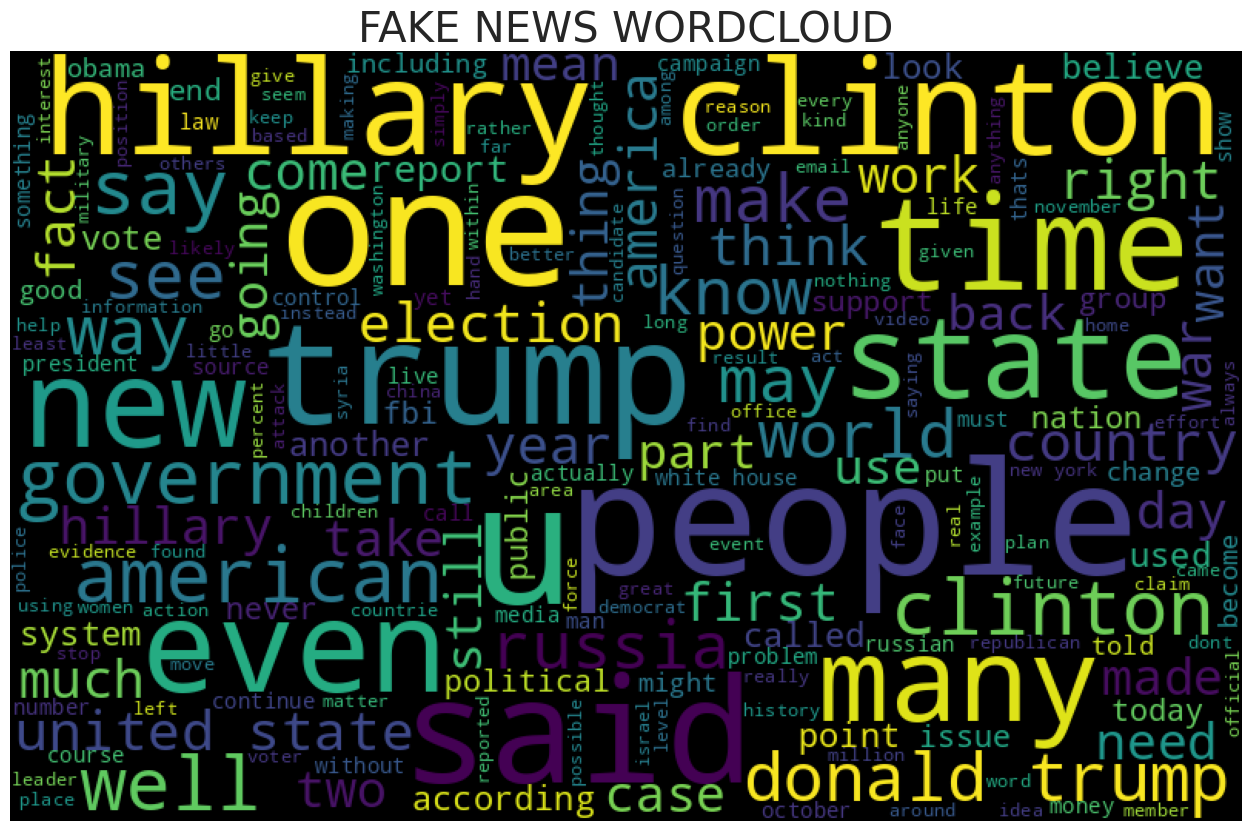

In [128]:
from wordcloud import WordCloud

# Create and generate a word cloud image FAKE_NEWS
fake_data = df[df["label"] == "FAKE"]
fake_text = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('FAKE NEWS WORDCLOUD',fontsize= 30)
plt.show()


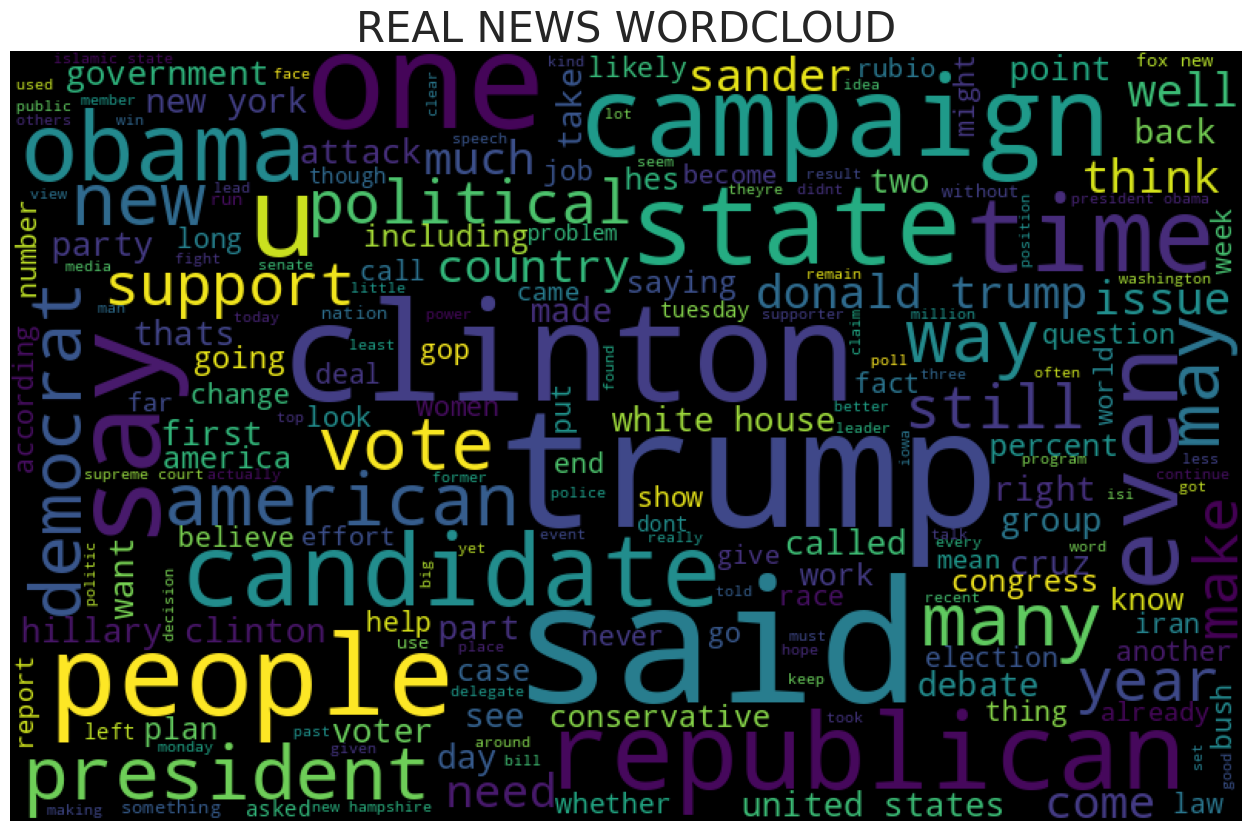

In [129]:
# Create and generate a word cloud image REAL_NEWS
real_data = df[df["label"] == "REAL"]
real_text = ' '.join([text for text in real_data.text])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_text)
plt.figure(figsize= [20,10])
plt.imshow(wordcloud)
plt.axis("off")
plt.title('REAL NEWS WORDCLOUD',fontsize= 30)
plt.show()

label
FAKE    3164
REAL    3171
Name: text, dtype: int64


<Axes: xlabel='count', ylabel='label'>

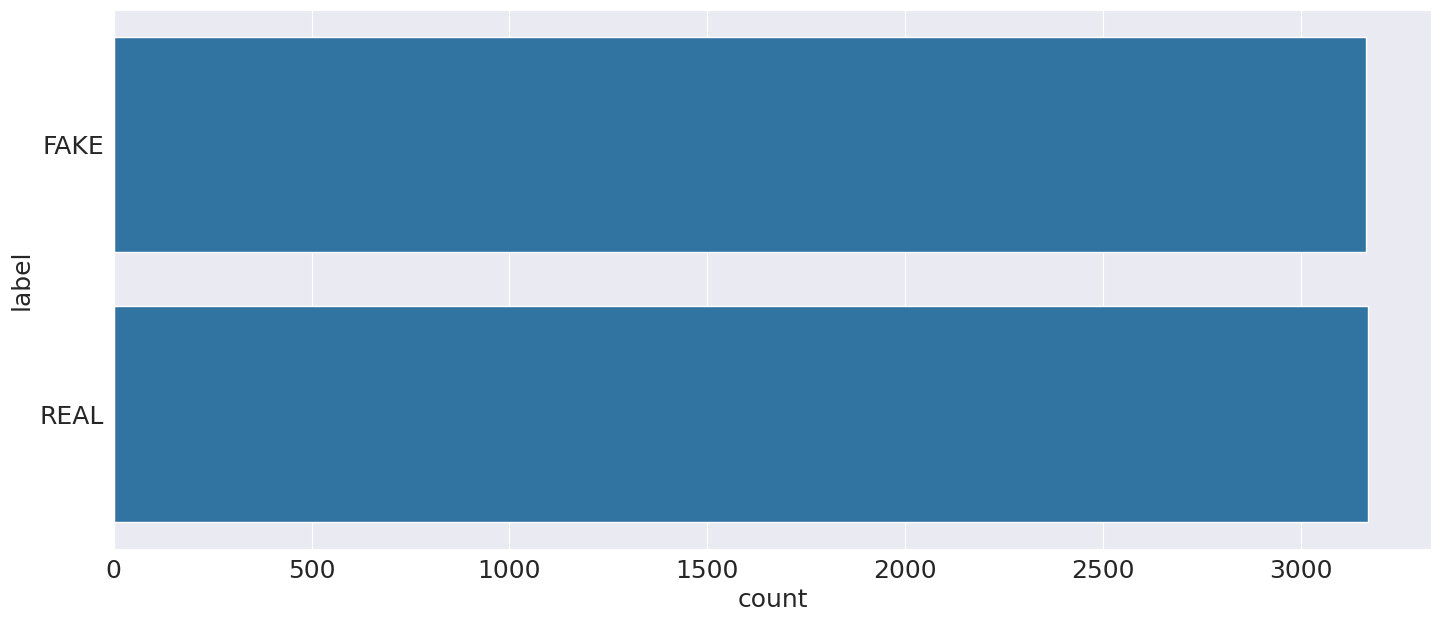

In [130]:
#Comparing the frequency of Fake and Real News
import seaborn as sns
print(df.groupby(['label'])['text'].count())
sns.countplot(df['label'])

Text(0.5, 1.0, 'Fake news')

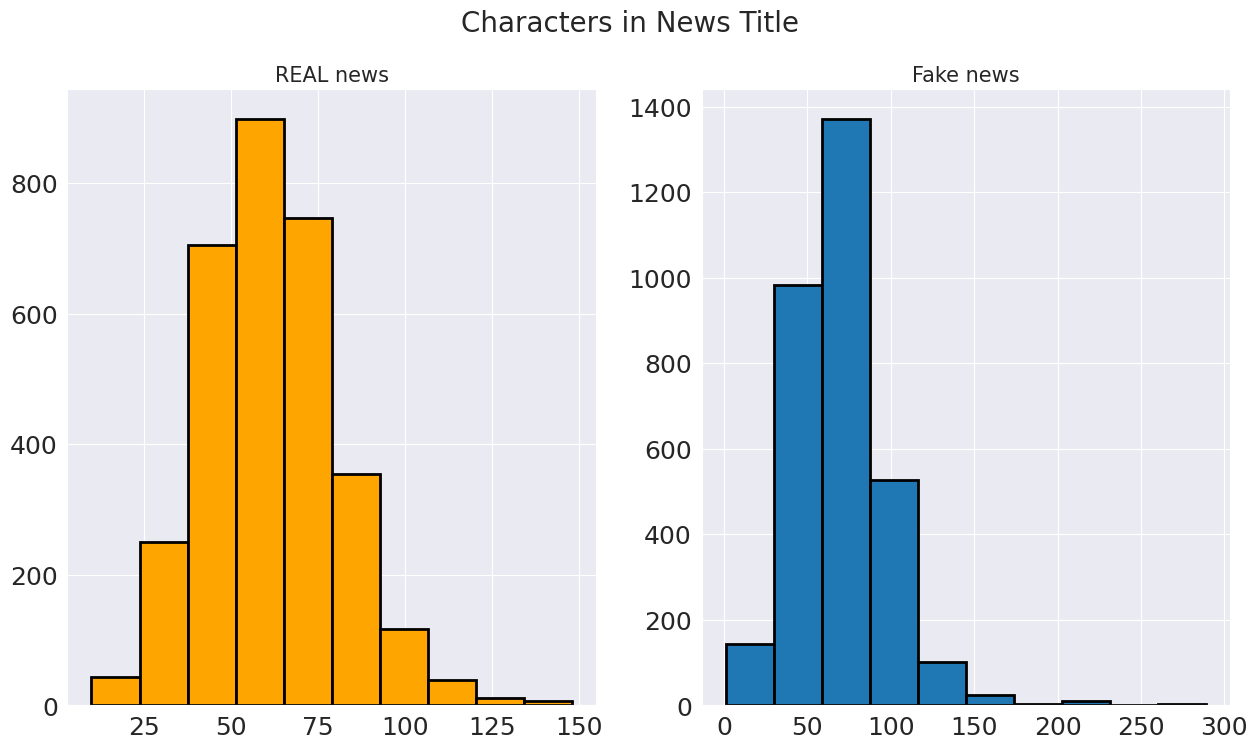

In [131]:
#Comparing the Total numbers of Characters in the Feature Title

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Characters in News Title',fontsize=20)
news_len=df[df['label']=='REAL']['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('REAL news',fontsize=15)
news_len=df[df['label']=='FAKE']['title'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Fake news',fontsize=15)

In [132]:

#creating a bag of words with the consecutive frequency for fake text

import nltk
import seaborn as sns
fake_text_vis =' '.join([str(x) for x in df[df['label']=='FAKE']['New_text']])
a = nltk.FreqDist(fake_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

Word  Count
40181          bawdy      1
24813           1961      7
49632  trumpmoreover      1
5601             odd     60
53707       palmetto      3
12563      expulsion     29
39631    ridehailing      4
42208           1018      1
31956     minutelong      1
52475        necking      1

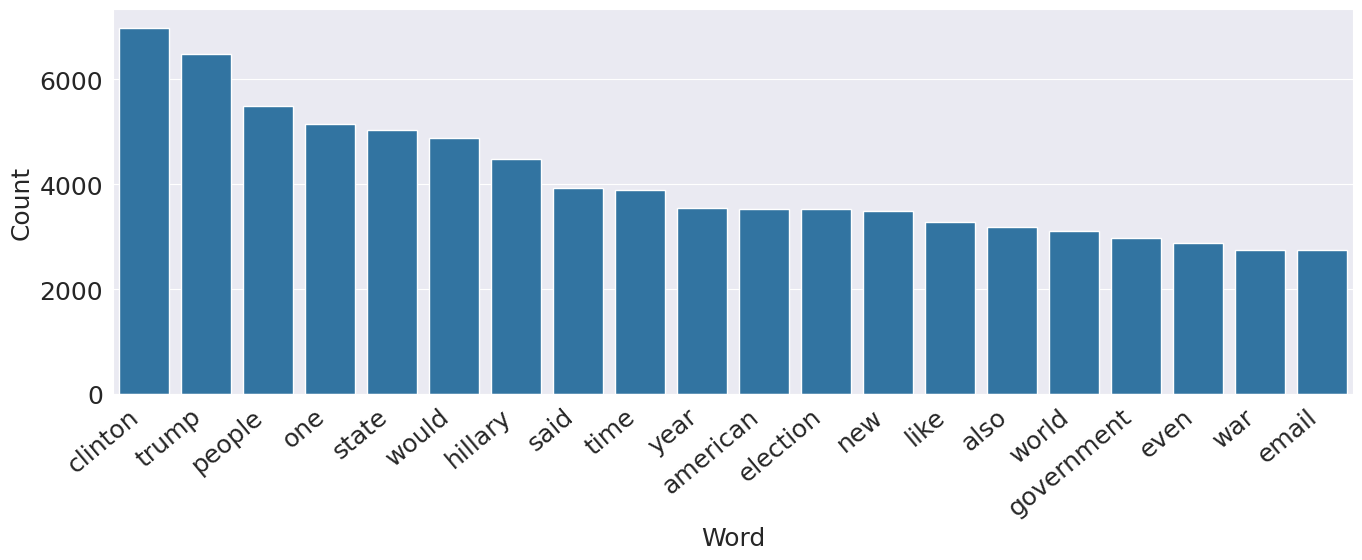

In [133]:
# selecting top 20 most frequent hashtags
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [134]:
#creating a bag of words with the consecutive frequency for Real text
import nltk
import seaborn as sns
real_text_vis =' '.join([str(x) for x in df[df['label']=='REAL']['New_text']])
a = nltk.FreqDist(real_text_vis.split())
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
d.sample(10)

Word  Count
67789           daysfox      1
41619          crisisas      2
9003         abouttrump      1
32490   emwaziaccording      1
32018    transcriptsthe      2
71133        boehnerits      1
40098        pinczowski      3
54956  everaccelerating      1
42930         ownreason      1
4688              penis      4

In [ ]:
d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Word", y = "Count")
ax.set_xticklabels(d["Word"], rotation=40, ha="right")
ax.set(ylabel = 'Count')
plt.show()

In [136]:
df["label"]=df["label"].replace(["FAKE","REAL"],value=[1,0]) #Label Encoding

In [137]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Assuming you have X_train and X_test as lists of strings
X_train, X_test, y_train, y_test = train_test_split(df['New_text'], df['label'], test_size=0.2, random_state=7, stratify=df['label'])

# Convert labels to numeric using label encoding
df["label"] = df["label"].replace(["FAKE", "REAL"], value=[1, 0])

# Vectorize the text data
vectorizer = TfidfVectorizer(min_df=10, max_df=0.8)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)


# Continue with your machine learning model training using X_train_resampled and y_train_resampled


In [138]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Train the RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train_resampled,y_train_resampled)

# Make predictions on the test set
y_pred = model1.predict(X_test_vec)

# Evaluate the model
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy1)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9021310181531176
Confusion Matrix:
 [[573  61]
 [ 63 570]]


In [139]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

model2 = LogisticRegression(max_iter = 500)
model2.fit(X_train_resampled,y_train_resampled)
pred2 = model2.predict(X_test_vec)
accuracy2 = accuracy_score(y_test,pred2)
cm2 = confusion_matrix(y_test,pred2)
print("Accuracy score : {}".format(accuracy2))
print("Confusion matrix : \n {}".format(cm2))

Accuracy score : 0.9116022099447514
Confusion matrix : 
 [[561  73]
 [ 39 594]]


In [140]:
#Support Vector Classification.
from sklearn.svm import SVC
model3=SVC()
model3.fit(X_train_resampled,y_train_resampled)

pred3 = model3.predict(X_test_vec)

accuracy3 = accuracy_score(y_test,pred3)
cm3 = confusion_matrix(y_test,pred3)
print("Accuracy score : {}".format(accuracy3))
print("Confusion matrix : \n {}".format(cm3))

Accuracy score : 0.9289660615627466
Confusion matrix : 
 [[576  58]
 [ 32 601]]


In [141]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train_resampled,y_train_resampled)

pred4 = model4.predict(X_test_vec)

accuracy4 = accuracy_score(y_test,pred4)
cm4= confusion_matrix(y_test,pred4)
print("Accuracy score : {}".format(accuracy4))
print("Confusion matrix : \n {}".format(cm4))

Accuracy score : 0.8121546961325967
Confusion matrix : 
 [[511 123]
 [115 518]]


In [142]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels={'RandomForestClassifier':accuracy1,'LogisticRegression':accuracy2,
        'SVC':accuracy3,'DecisionTreeClassifier':accuracy4}

<BarContainer object of 4 artists>

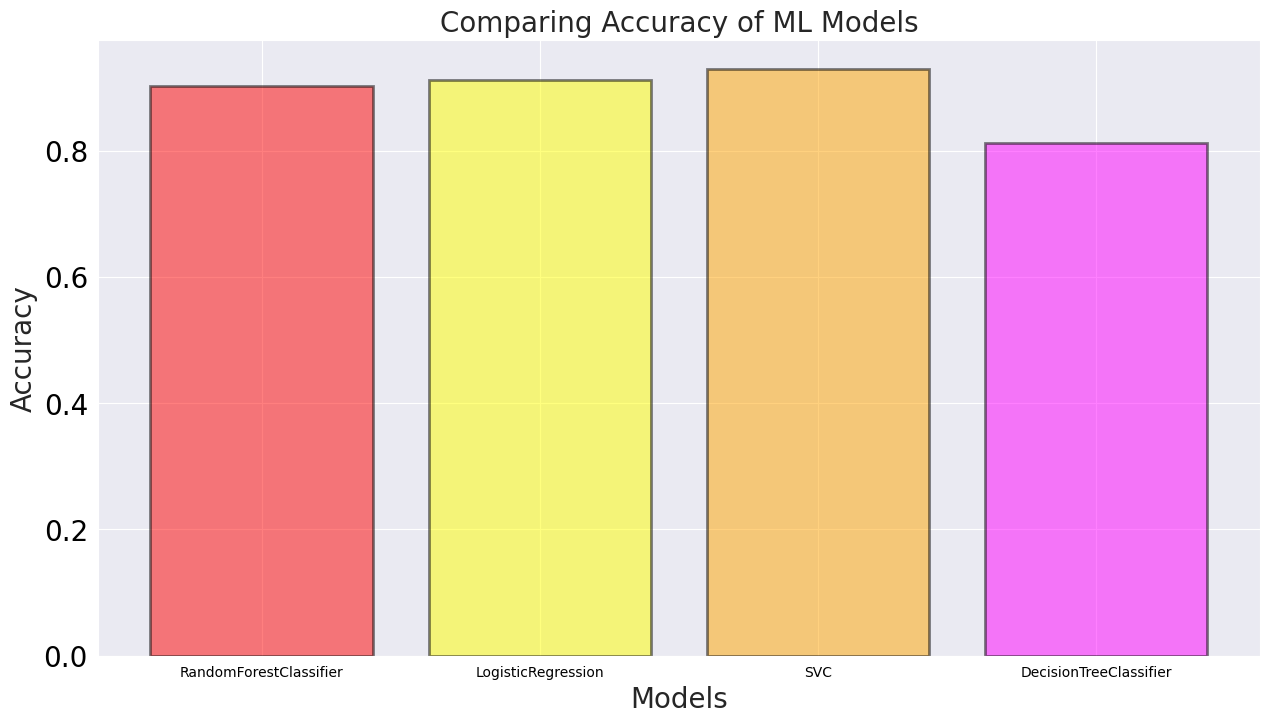

In [143]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(15,8))
plt.title('Comparing Accuracy of ML Models',fontsize=20)
colors=['red','yellow','orange','magenta','cyan']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5)

Confusion Matrix for RandomForestClassifier
Accuracy score : 0.9021310181531176


(<Figure size 1700x700 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

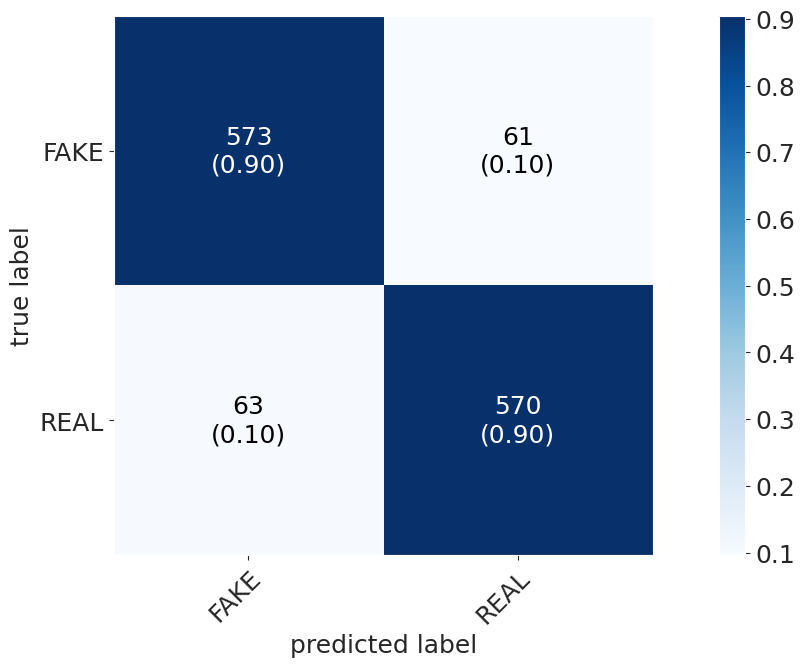

In [144]:
from mlxtend.plotting import plot_confusion_matrix

print("Confusion Matrix for RandomForestClassifier")
print("Accuracy score : {}".format(accuracy1))
plot_confusion_matrix(conf_mat=conf_matrix,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for Logistic Regression
Accuracy score : 0.9116022099447514


(<Figure size 1700x700 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

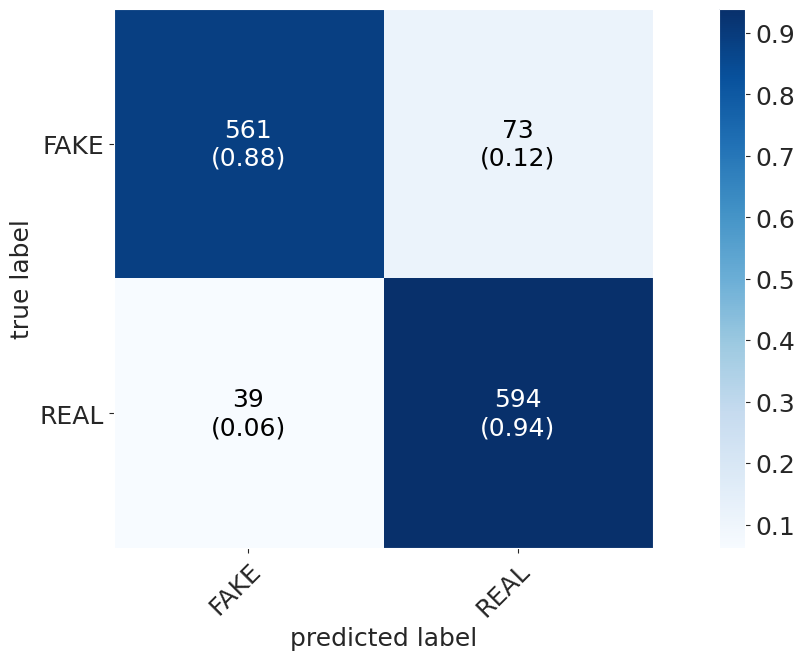

In [145]:
print("Confusion Matrix for Logistic Regression")
print("Accuracy score : {}".format(accuracy2))

plot_confusion_matrix(conf_mat=cm2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for SVC
Accuracy score : 0.9289660615627466


(<Figure size 1700x700 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

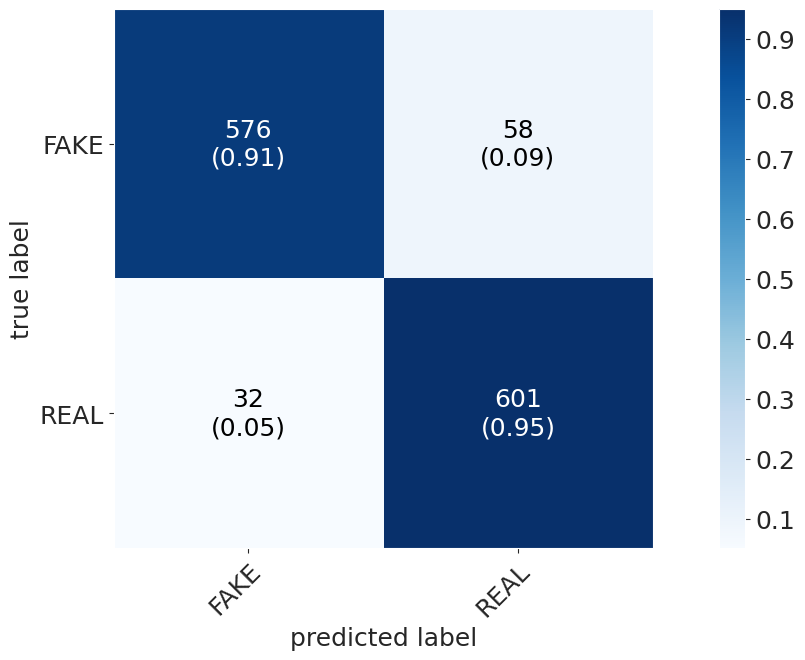

In [146]:
print("Confusion Matrix for SVC")
print("Accuracy score : {}".format(accuracy3))
plot_confusion_matrix(conf_mat=cm3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion Matrix for DecisionTreeClassifier
Accuracy score : 0.8121546961325967


(<Figure size 1700x700 with 2 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

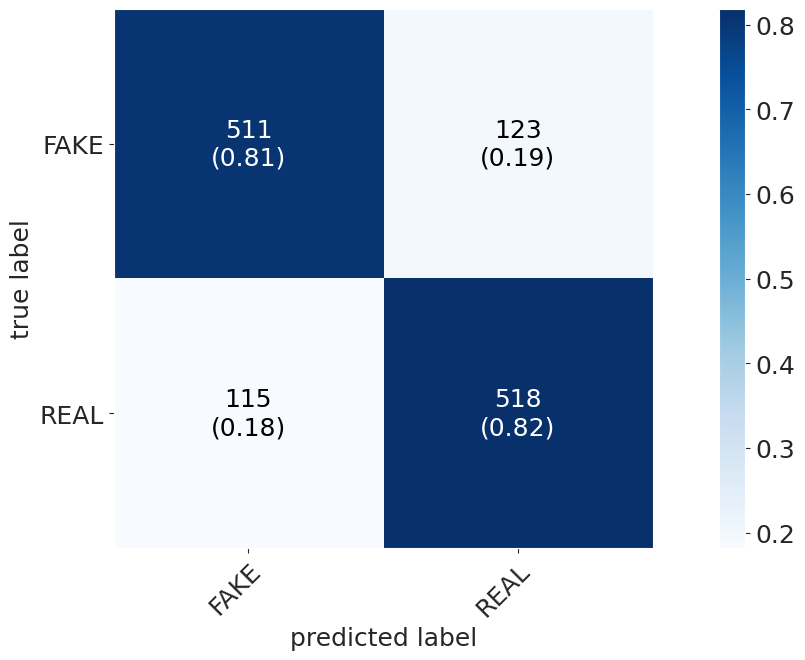

In [147]:
print("Confusion Matrix for DecisionTreeClassifier")
print("Accuracy score : {}".format(accuracy4))
plot_confusion_matrix(conf_mat=cm4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [148]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.3 MB/s eta 0:00:00


In [149]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
import shap
from sklearn.ensemble import RandomForestClassifier

In [151]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)
explainer = shap.Explainer(model1, X_train_vec, feature_names=feature_names)
shap_values = explainer(X_test_vec)
print(shap_values.values.shape) # (5000, 16438, 2)

['100' '1000' '10000' ... 'zone' 'zuckerberg' 'zuesse']


100%|===================| 2531/2534 [03:04<00:00]       

(1267, 12984, 2)


Text for instance 9 : written daniel mcadams american obsessing tomorrow election obama administration launched serious military escalation syria special force ground jet fighter air deployed operation take raqqa isi control chairman joint chief staff general dunford announced weekend turkey agreed longterm plan seizing holding governing syrian city beginning usrecognized rival syrian government benghazi libya discus today liberty report copyright 2016 ronpaul institute permission reprint whole part gladly granted provided full credit live link given


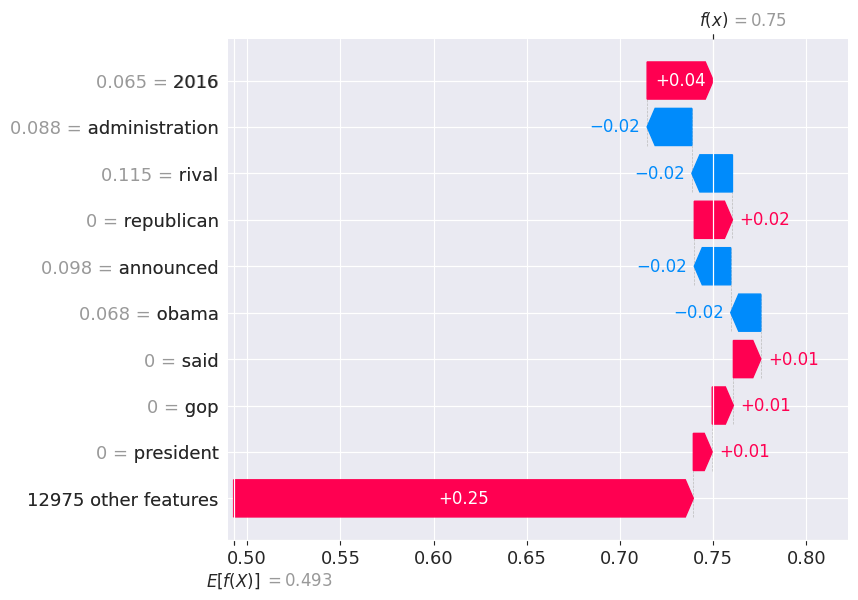

In [152]:
shap.initjs()
ind = 9
text_instance = X_test.iloc[ind]
print("Text for instance", ind, ":", text_instance)

shap.plots.waterfall(shap_values[ind,:,1])

Text for instance 122 : washington cnn faction gop unhappy donald trump party presumptive nominee one last plan stop mogul staging allout delegate revolt republican national conventionthe farfetched idea latest reflection campaign cycle anything ordinary stem continuing dissatisfaction among conservative stalwart trump behaving running campaign two longtime gop veteran say wouldnt bet effort workingthe effort come rough time gop democratic party heaviest hitter including president barack obama vice president joe biden massachusetts sen elizabeth warren line behind hillary clinton trump republican forced criticize nominee recent comment trump federal judge mexican heritage drawn widespread rebuke put gop leader corner defend endorsement trump disavowing commentsone vocal advocate delegate revolt conservative commentator weekly standard editor bill kristol also actively seeking candidate mount independent bid trump thus far availkristol tweeted late thursday idea conscience convention de

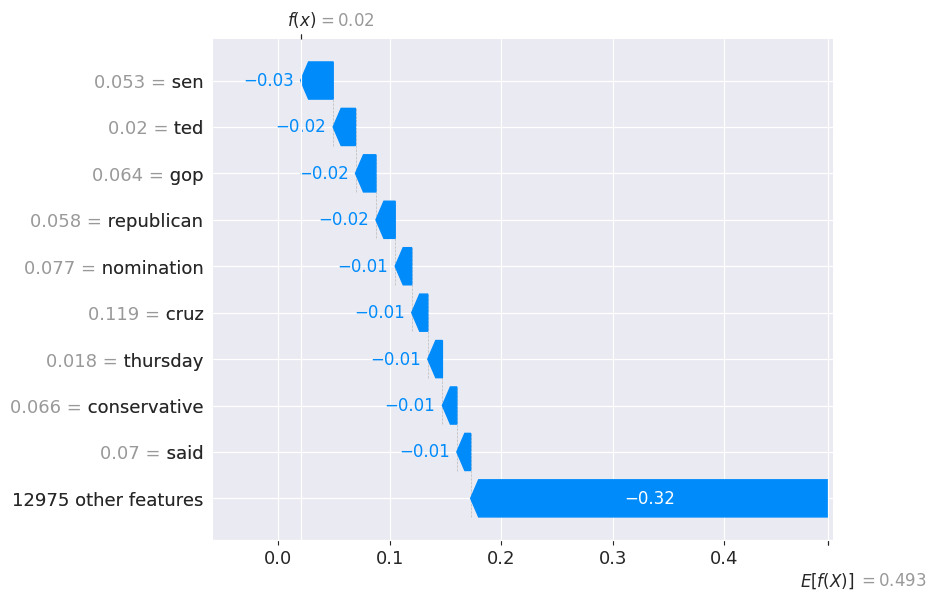

In [153]:
shap.initjs()

ind = 122
text_instance = X_test.iloc[ind]
print("Text for instance", ind, ":", text_instance)
# This could well be the worst film I've ever seen. Despite what Mikshelt claims,
# this movie isn't even close to being historically accurate. It starts badly and
# then it's all downhill from there. We have Hitler's father cursing his own bad
# luck on the "fact" that he'd married his niece! They were in fact, second cousins.
# Hitler's mother, Klara, called his father, Alois, "uncle" because Alois had been
# adopted and raised by Klara's grandfather and brought up as his son, [...]

shap.plots.waterfall(shap_values[ind,:,1])

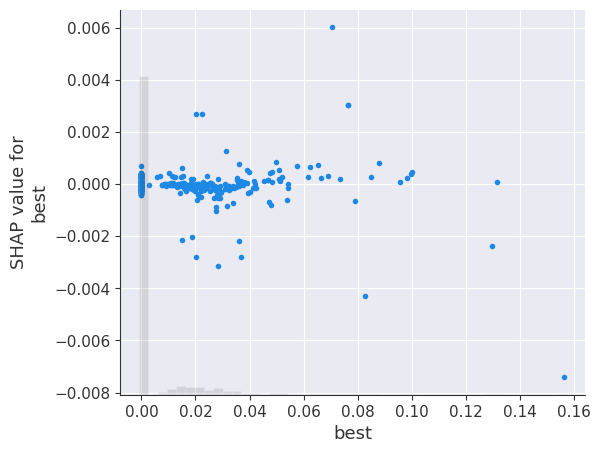

In [154]:
shap.plots.scatter(shap_values[:,feature_names.tolist().index("best"),1])


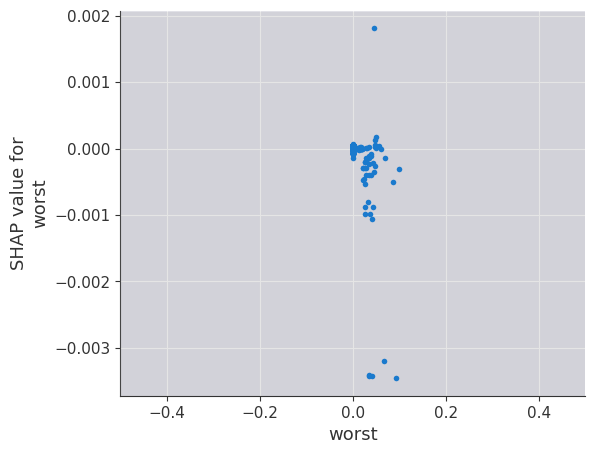

In [155]:
shap.plots.scatter(shap_values[:,feature_names.tolist().index("worst"),1])


In [156]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=dc5c3a101ea7e17d519cb9102d707e108ad048c6e76b85ae8d73790773e2656d
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [157]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer

# Create a pipeline with the TF-IDF vectorizer and your trained model
pipeline = make_pipeline(vectorizer , model1)

# Initialize the LimeTextExplainer
explainer = LimeTextExplainer()

# Select a random test sample for explanation
idx = 10

true_label = y_test.iloc[idx]

# Generate an explanation for the sample
exp = explainer.explain_instance(text_instance , pipeline.predict_proba, num_features=10, labels=[0, 1])

# Display the explanation
exp.show_in_notebook(text=text_instance, labels=(true_label,))